<a href="https://colab.research.google.com/github/SSS-BBB/NN_Learn/blob/main/NN_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NN learn on random value**

In [219]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create random data

In [220]:
DATA_AMOUNT = 5

In [221]:
X = np.arange(0, DATA_AMOUNT, 1)
X.shape

(5,)

In [222]:
low_y = 0
high_y = 5
y = (high_y - low_y) * np.random.rand(DATA_AMOUNT) + low_y
y.shape

(5,)

## Plot random data

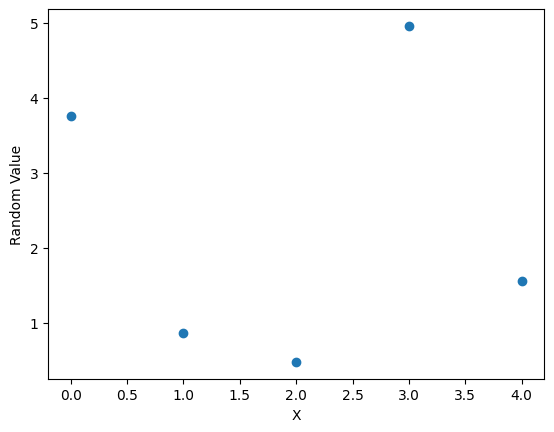

In [223]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Random Value")
plt.show()

## NN Module

In [224]:
class NNModel(nn.Module):
  def __init__(self, hidden_node_list):

    super().__init__()

    # Input layer
    self.inp = nn.Linear(1, hidden_node_list[0])

    # Hidden layers
    self.hidden_list = nn.ModuleList()
    for i in range(len(hidden_node_list) - 1):
      self.hidden_list.append(nn.Linear(hidden_node_list[i], hidden_node_list[i + 1]))

    # Output layer
    self.out = nn.Linear(hidden_node_list[-1], 1)

  def forward(self, X):

    # Input
    X = F.relu(self.inp(X))

    # Hidden
    for h_layer in self.hidden_list:
      X = F.relu(h_layer(X))

    # Output
    X = self.out(X)

    return X

In [225]:
# Random Hidden layers
hidden_layers = np.random.randint(low=1, high=15, size=5)
hidden_layers = np.asarray(hidden_layers)

In [226]:
hidden_layers

array([12,  5, 14,  6, 10])

In [227]:
model = NNModel([7, 5, 4, 7])

## Loss Function And Optimizer



In [228]:
loss_f = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Convert numpy to tensor

In [229]:
X = torch.from_numpy(X)
X

tensor([0, 1, 2, 3, 4])

In [230]:
# Convert int to float
X = X.float()
X

tensor([0., 1., 2., 3., 4.])

In [231]:
X.dtype

torch.float32

In [232]:
y = torch.from_numpy(y)

In [233]:
y

tensor([3.7594, 0.8588, 0.4758, 4.9583, 1.5616], dtype=torch.float64)

In [234]:
# Reshaping
X = torch.reshape(X, (-1, 1))
X.shape

torch.Size([5, 1])

In [235]:
# Reshaping
y = torch.reshape(y, (-1, 1))
y.shape

torch.Size([5, 1])

In [236]:
y = y.float()
y.dtype

torch.float32

## Training!!!

Epoch: 0
Loss: 8.564443588256836


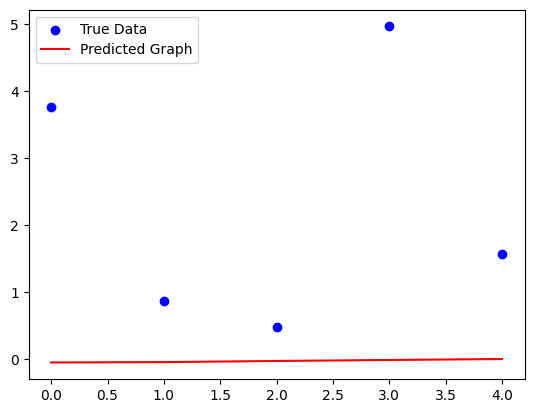

Epoch: 99
Loss: 2.5306382179260254


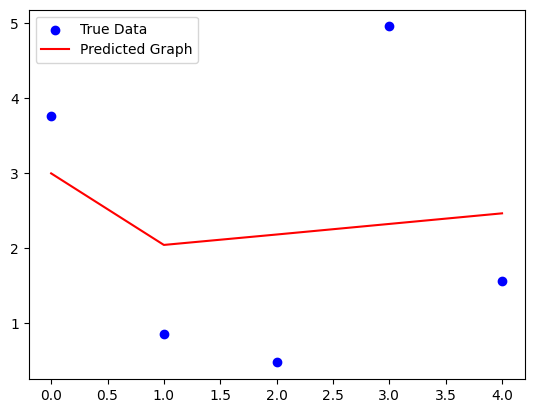

Epoch: 199
Loss: 2.001404047012329


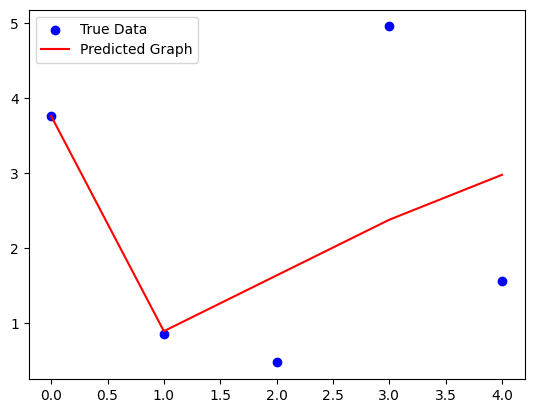

Epoch: 299
Loss: 1.3949801921844482


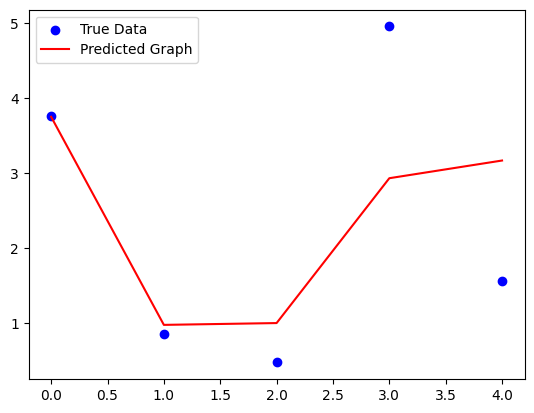

Epoch: 399
Loss: 0.016614729538559914


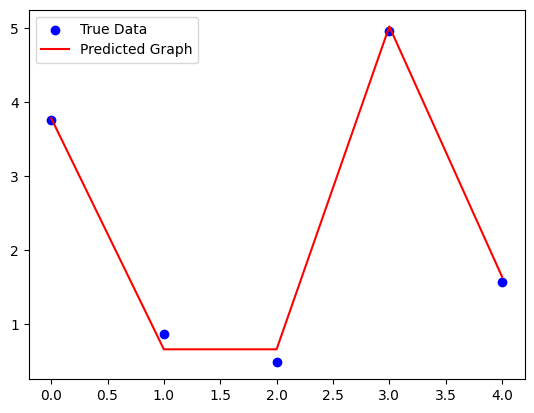

Epoch: 499
Loss: 0.014666249975562096


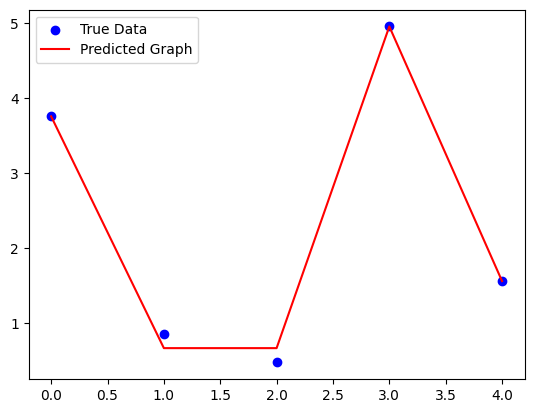

Epoch: 599
Loss: 0.014666244387626648


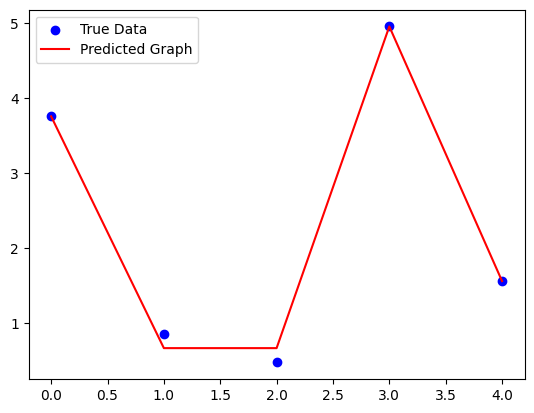

Epoch: 699
Loss: 0.014666244387626648


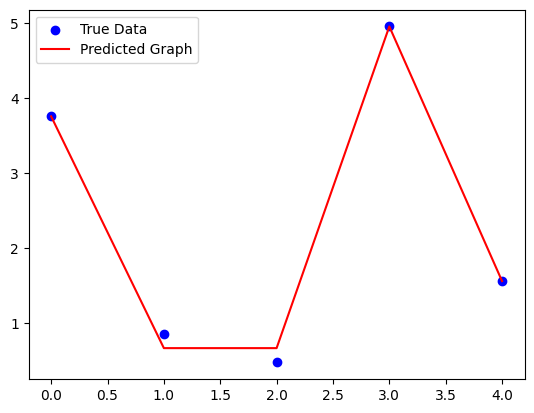

Epoch: 799
Loss: 0.014666244387626648


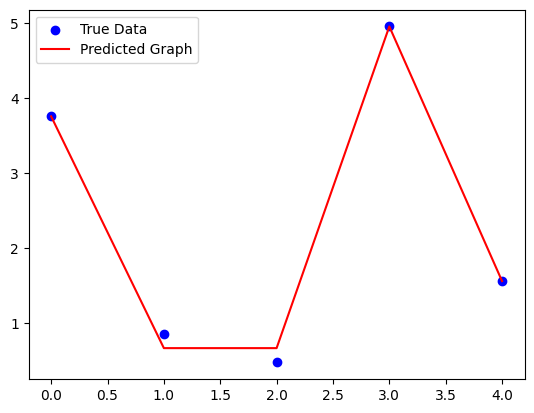

Epoch: 899
Loss: 0.014666244387626648


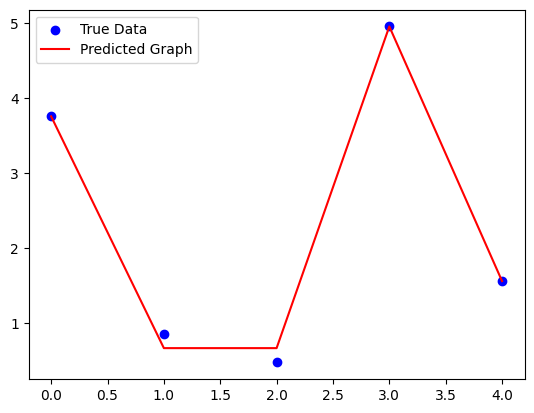

Epoch: 999
Loss: 0.014666244387626648


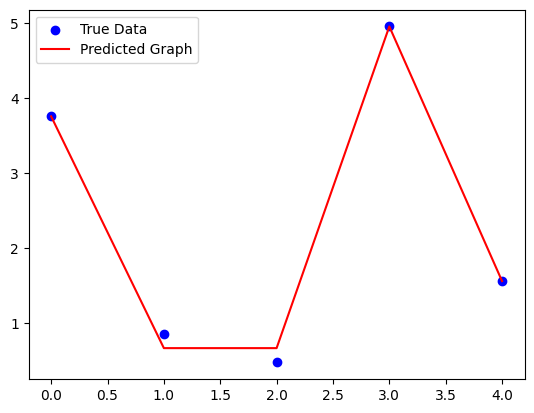

Epoch: 1099
Loss: 0.014666244387626648


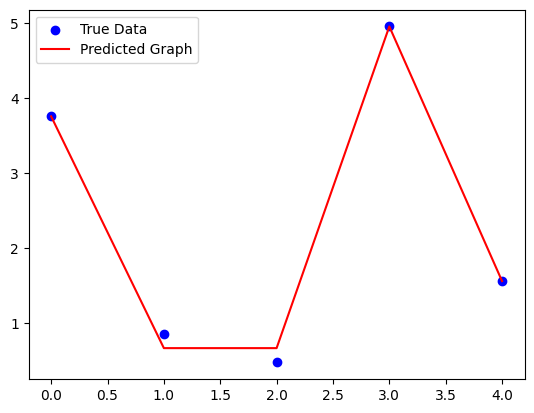

Epoch: 1199
Loss: 0.014666244387626648


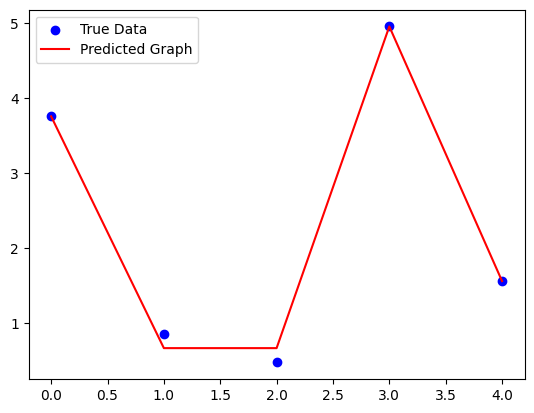

Epoch: 1299
Loss: 0.014666244387626648


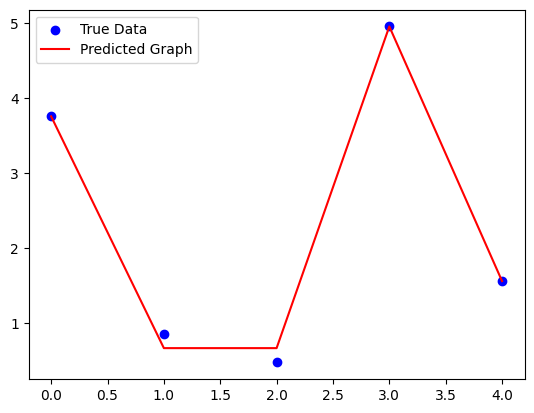

Epoch: 1399
Loss: 0.014667133800685406


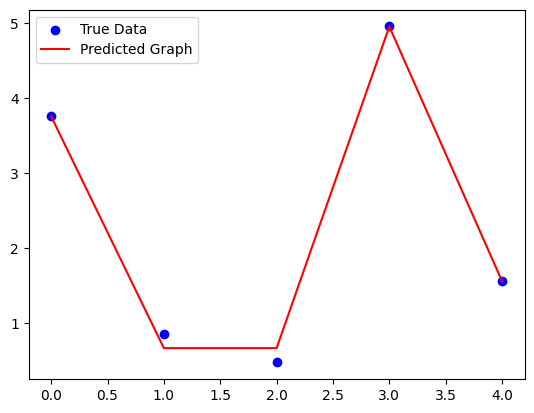

Epoch: 1499
Loss: 0.014667889103293419


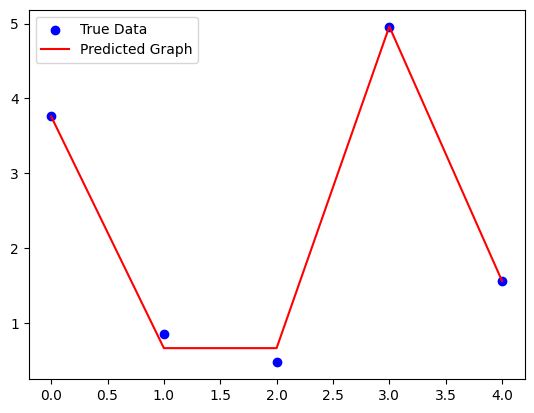

Epoch: 1599
Loss: 0.014666244387626648


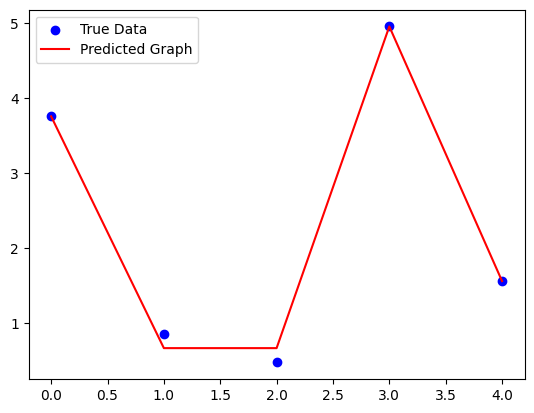

Epoch: 1699
Loss: 0.014666244387626648


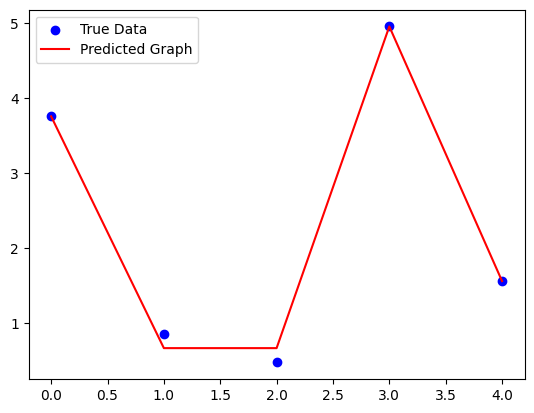

Epoch: 1799
Loss: 0.014666244387626648


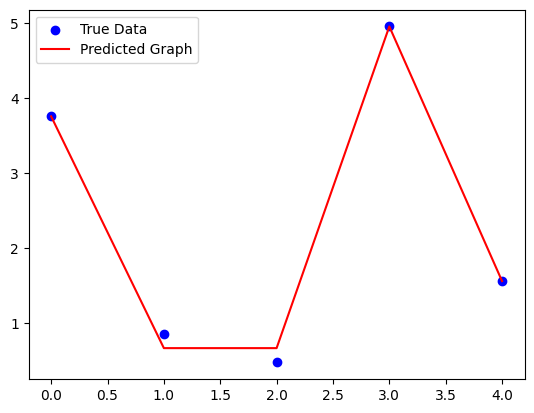

Epoch: 1899
Loss: 0.014676669612526894


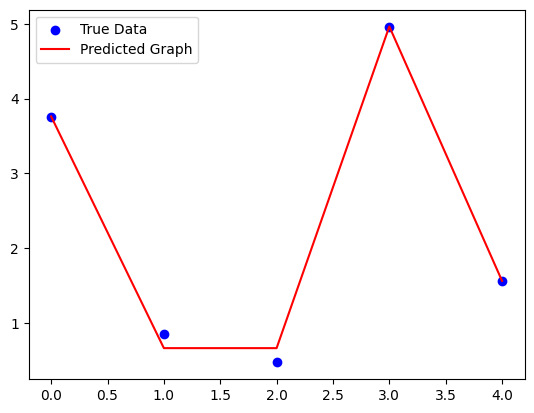

Epoch: 1999
Loss: 0.014666246250271797


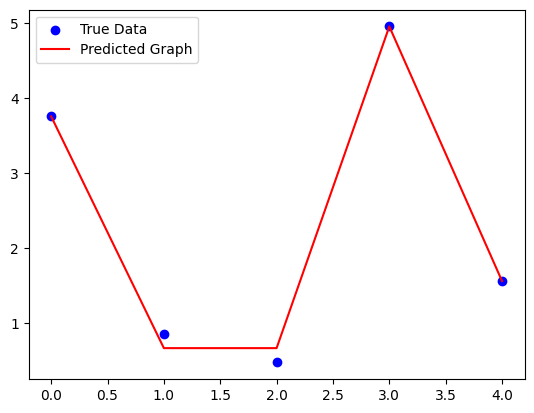

Training took: 0.15751729011535645 minutes.


In [237]:
import time
start_time = time.time()

# Hyper parameter
epochs = 2000
show_every_epochs = 100 # Show info every n epochs

# Tracking variables
losses = []

# Train loop
for ep in range(epochs):

  # Predict
  y_pred = model(X)

  # Loss
  loss = loss_f(y_pred, y)
  losses.append(loss.item())

  # Back Propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Print every n epochs
  if (ep + 1) % show_every_epochs == 0 or ep == 0:

    # Print info
    print(f"Epoch: {ep}")
    print(f"Loss: {loss.item()}")

    # Plot graph

    # True
    plt.scatter(X, y, color="b", label="True Data")

    # Predicted
    plt.plot(X, y_pred.detach(), color="r", label="Predicted Graph")

    plt.legend()
    plt.show()


# Calculate training time
current_time = time.time()
total = current_time - start_time
print(f"Training took: {total/60} minutes.")

## Final Result

Text(0, 0.5, 'Loss')

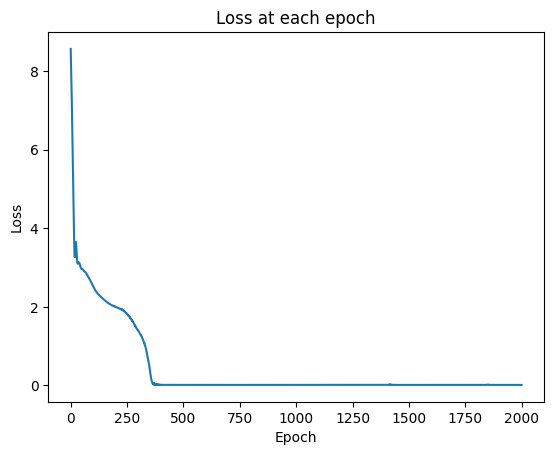

In [238]:
# Loss Graph
plt.plot(losses)
plt.title("Loss at each epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

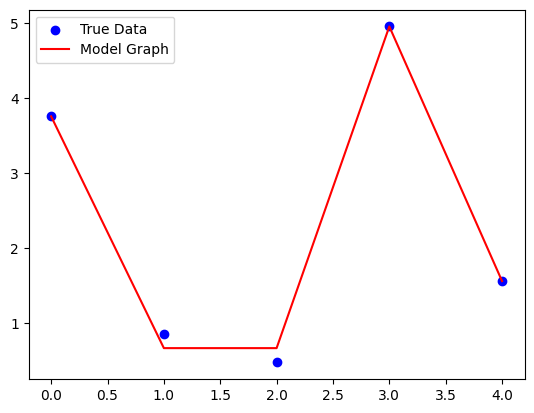

In [239]:
# Final Result Graph
with torch.no_grad():
  y_val = model(X)

  # True
  plt.scatter(X, y, color="b", label="True Data")

  # Predicted
  plt.plot(X, y_val, color="r", label="Model Graph")

  plt.legend()
  plt.show()